In [1]:
"""
http://scikit-learn.org/stable/model_selection.html
1. Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

from time import time


In [2]:
"""
SVM
Source: Week 10 Notebook

from sklearn.linear_model import LinearRegression
"""

from scipy import stats
import pylab as pl
import seaborn as sns; 

from sklearn.svm import SVR, LinearSVR

sns.set()

In [3]:
# Load train data
train_labels = pd.read_csv('../Data/final/train_labels_processed.csv', sep=',', engine='python')
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
print('Train data done')

# Load test data
test_labels = pd.read_csv('../Data/final/test_labels_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')
print('Test data done')

Train data done
Test data done


In [4]:
validation_data, validation_labels = train_data[:30000], train_labels[:30000]
train_data, train_labels = train_data[30000:], train_labels[30000:]

In [5]:
rmv = [
    'calculatedbathnbr',
    'fullbathcnt',
    'heatingorsystemtypeid',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'finishedsquarefeet12'
]

train_data = train_data.drop(rmv, axis=1) # axis=1 to remove columns
validation_data = validation_data.drop(rmv, axis=1)

In [6]:
# Fit models with three different kernels
t0 = time()
rbf = SVR(kernel='poly', tol=.01)
rbf.fit(train_data, np.ravel(train_labels))

print(rbf)
print('Runtime: ', time()-t0)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
Runtime:  17576.422430038452


In [7]:
# Predict the output
t0 = time()
predicted_rbf = rbf.predict(validation_data)
print('Runtime: ', time()-t0)

Runtime:  16.95995306968689


In [8]:
print('rbf')
print("Mean squared error:    %.4f" %mean_squared_error(validation_labels, predicted_rbf))
print("Mean absolute error:   %.4f" %mean_absolute_error(validation_labels, predicted_rbf))
print("Median absolute error: %.4f" %median_absolute_error(validation_labels, predicted_rbf))

rbf
Mean squared error:    0.0428
Mean absolute error:   0.0747
Median absolute error: 0.0383


Mean Squared Error:  0.04277456954643712
Variance Score:  -0.6486791836269725


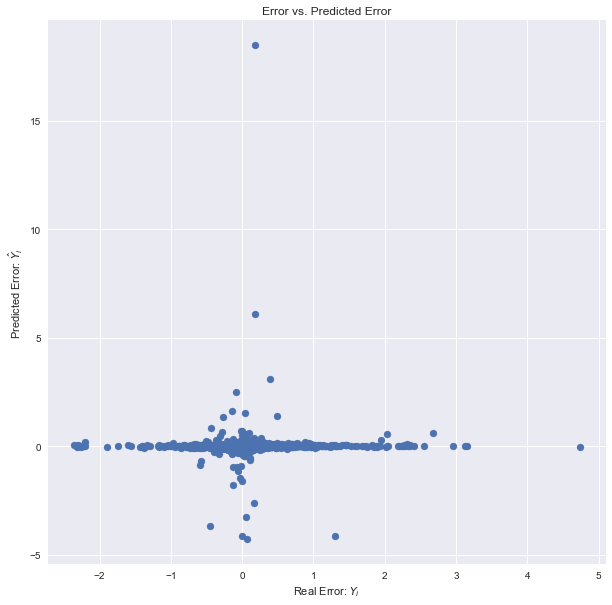

In [9]:
# 6. Test the accuracy of the classifier
# Start by plotting the train labels against the predicted data 
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(np.ravel(validation_labels), predicted_rbf)
#ax.set_xlim(-.5, .5)
ax.set_xlabel("Real Error: $Y_i$")
ax.set_ylabel("Predicted Error: $\hat{Y}_i$")
ax.set_title("Error vs. Predicted Error")

# Calculate the mean square error
mse = np.mean((predicted_rbf-np.ravel(validation_labels))**2)
print('Mean Squared Error: ', mse)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
var_score = rbf.score(validation_data, validation_labels)
print('Variance Score: ', var_score)